### Title: 
# Random Forest

### Description:
Random forests is a supervised learning algorithm. It can be used both for classification and regression. It is also the most flexible and easy to use algorithm. A forest is comprised of trees. It is said that the more trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance.

In this notebook, we will perform the Randon Forest algorithm from the scikit-learn package, plot the confussion matrix and the ROC-AUC curve

### Authors:
#### Hugo Cesar Octavio del Sueldo
#### Jose Lopez Galdon

### Date:
04/12/2020

### Version:
2.0

***

### Libraries

In [19]:
    # Numpy & Pandas to work with the DF
import numpy as np
import pandas as pd

    # Seaborn / matplotlib for graphs
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

    # Import Sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
import itertools
import scikitplot as skplt

    # Visualize DF
from IPython.display import display, HTML

    #Import pickle
import pickle

### Functions

In [5]:
'''
This function prints and plots the confusion matrix:

cm = confussion_matrix using the prediction values
classes = name of the labels
cmap & tittle color map and tittle of the plot
'''
def plot_confusion_matrix(model_predictions, model_name,normalize = False): 
    cm = confusion_matrix(y_val, model_predictions, labels = [0, 1])
    classes=['Fully Pay', 'Non-payment']
    cmap = plt.cm.Reds
    title = f'{model_name} Confusion Matrix'
    fontsize = 12
    fontsize_lab = 15
    fontsize_tit = 20
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals = 3)
        
        # Plot params
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = fontsize_tit)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0, fontsize = fontsize)
    plt.yticks(tick_marks, classes, fontsize = fontsize)
    
        # Itercool params
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label', fontsize = fontsize_lab)
    plt.xlabel('Predicted label', fontsize = fontsize_lab)

### Load data

In [6]:
    # To automate the work as much as possible, we will parameterize the codes, so in this case, we will create an objetct with
    # the path root
name = 'X_train'

X_train = pd.read_csv(f'../data/03_processed/{name}.csv',  # Path root: here we include an f-string with the variable name
                   low_memory = False)                     # To avoid warnings we use set low_memory = False

name = 'Y_train'

y_train = pd.read_csv(f'../data/03_processed/{name}.csv',  # Path root: here we include an f-string with the variable name
                   low_memory = False)                     # To avoid warnings we use set low_memory = False

name = 'X_val'

X_val = pd.read_csv(f'../data/03_processed/{name}.csv',    # Path root: here we include an f-string with the variable name
                   low_memory = False)                     # To avoid warnings we use set low_memory = False

name = 'Y_val'

y_val = pd.read_csv(f'../data/03_processed/{name}.csv',    # Path root: here we include an f-string with the variable name
                   low_memory = False)                     # To avoid warnings we use set low_memory = False

In [7]:
    # Transform to 1d array
y_train = np.ravel(y_train)

### Random Forest Prediction

In [8]:
%%time
    # Train
rfreg = RandomForestClassifier(n_estimators = 1000, random_state = 1322, n_jobs = -1)
rfreg.fit(X_train, y_train)

    # Predict with the test and calculate tha accuracy
y_pred = rfreg.predict(X_val)

print('Accuracy of Random Forest classifier on test set: {:.5f}'.format(rfreg.score(X_val, y_val)))

Accuracy of Random Forest classifier on test set: 0.76464
CPU times: user 29min 30s, sys: 31.7 s, total: 30min 2s
Wall time: 8min 11s


### Importance columns

In [9]:
importance = pd.DataFrame(rfreg.feature_importances_, 
                          X_val.columns, 
                          columns = ['Importance']).sort_values(by = ['Importance'], 
                                                                ascending = False)
display(HTML(importance.to_html()))

,Importance
int_rate,5.221715e-02
dti,4.595935e-02
avg_cur_bal,4.081376e-02
bc_open_to_buy,3.898797e-02
mo_sin_old_rev_tl_op,3.853521e-02
revol_bal,3.720397e-02
bc_util,3.708976e-02
revol_util,3.695620e-02
annual_inc,3.659129e-02
mo_sin_old_il_acct,3.658278e-02


Some of the most important variables are `int_rate`, `annual_inc` or `funded_amnt` this makes sense with our first hypothesis. On the other hand, the `addr_state` is not important.

### Confussion Matrix

It is a performance measurement for machine learning classification problem where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values.

It is extremely useful for measuring Recall, Precision, Specificity, Accuracy and most importantly AUC-ROC Curve.

#### Non normalized

Here we have the confussion matrix with the absolute values...

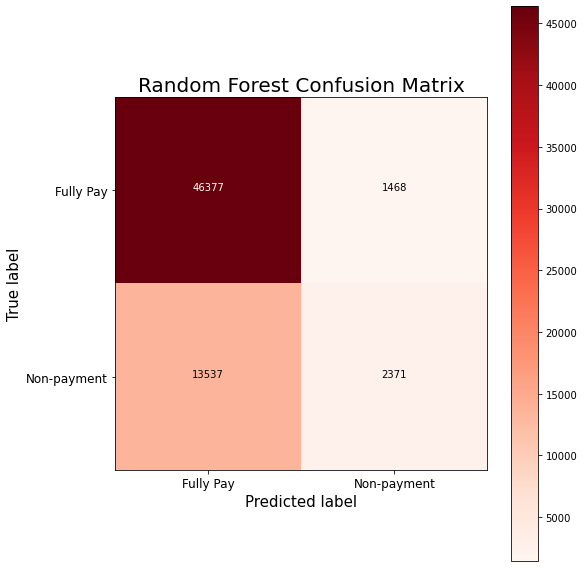

In [10]:
    # Set the size
plt.figure(figsize = (8, 8))

    # Use the function defined above
plot_confusion_matrix(y_pred, 'Random Forest', normalize = False)
plt.show()

#### Normalized

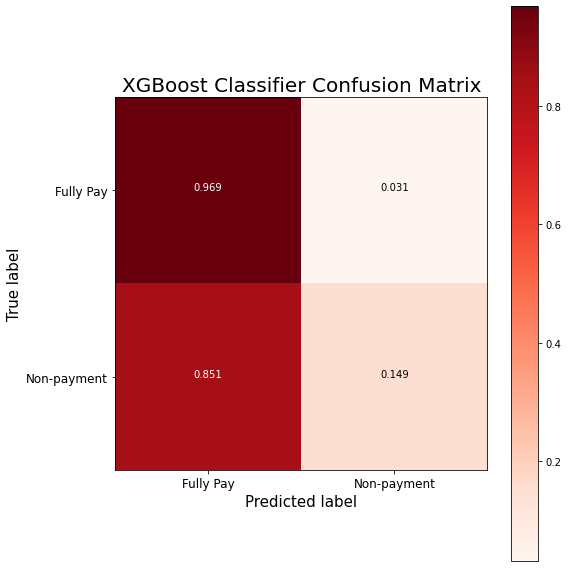

In [11]:
    # Set the size
plt.figure(figsize = (8, 8))

    # Use the function defined above
plot_confusion_matrix(y_pred, 'XGBoost Classifier', normalize = True)
plt.show()

Here we can see that our random forest model is quite good predicting Fully Pay members, because we have more than a 96.9% of *True Positives*, but is the worst predicting Non-payment clients, this is due from the total customers that non-pay we are predicting well only 15%.

### Classsification Report

In [12]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.97      0.86     47845
           1       0.62      0.15      0.24     15908

    accuracy                           0.76     63753
   macro avg       0.70      0.56      0.55     63753
weighted avg       0.74      0.76      0.71     63753



We can see at the `classification_report` that our model predict very well Fully Pay customers, because we have a high precision (remember *Precision = TP/(TP + FP)*) and therefore our recall (*Recall = TP/(TP+FN)*) is almost 100% this makes that the f1-score (*F1 Score = 2(Recall · Precision) / (Recall + Precision)*) is 86%.

On the other hand, as we said above the Random Forest model is very poor predicting Non-payment clientes. The main issue is that the recall is very low, that means we can not detect all the Non-payment, in other words, we have a bigger amount of False Positives.

### ROC Curve

AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.

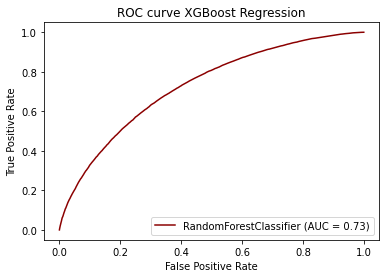

In [13]:
    # Parametrize
classifier = rfreg

disp = metrics.plot_roc_curve(rfreg, X_val, y_val, color='#8B0000')

# Set title
disp.ax_.set_title('ROC curve XGBoost Regression');

AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.

In this case we have an AUC = 0.73 that is high but not very high.

### Precision-Recall curve

Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced. In information retrieval, precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned.
The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).
A system with high recall but low precision returns many results, but most of its predicted labels are incorrect when compared to the training labels. A system with high precision but low recall is just the opposite, returning very few results, but most of its predicted labels are correct when compared to the training labels. An ideal system with high precision and high recall will return many results, with all results labeled correctly.

Random Forest: f1=0.240 auc=0.468


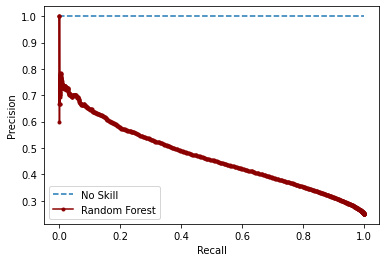

In [17]:
# predict probabilities
lr_probs = rfreg.predict_proba(X_val)
    
    # keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

    # calculate precision and recall for each threshold
lr_precision, lr_recall, _ = precision_recall_curve(y_val, lr_probs)
    
    # calculate scores
lr_f1, lr_auc = f1_score(y_val, y_pred), auc(lr_recall, lr_precision)
    
    # summarize scores
print('Random Forest: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
   
    # plot the precision-recall curves
no_skill = len(y_val[y_val==1]) / len(y_val)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Random Forest', color='#8B0000')
    
    # axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')

# show the legend
plt.legend()

# show the plot
plt.show()

### Cumulative gains curve

The cumulative gains curve is an evaluation curve that assesses the performance of the model and compares the results with the random pick. It shows the percentage of targets reached when considering a certain percentage of the population with the highest probability to be target according to the model.

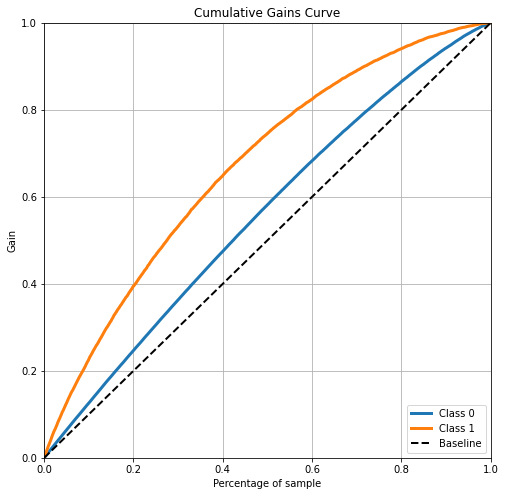

In [20]:
# Deriving Class probabilities
predicted_probabilities = rfreg.predict_proba(X_val)

    # Creating the plot
skplt.metrics.plot_cumulative_gain(y_val, predicted_probabilities, figsize=(8,8));

With the xgboost regression if we analyze the 50% of the clients we will obtain more than a 70% certainty, this is interisting if the company has to audit the clients only needs the 50% of the clients to reach the 70%.

### Lift curve

In addition to the cumulative gains curve, the lift curve is a widely used visualization of model performance. In definitive terms, the lift is a measure of the performance of a targeting model at predicting or classifying cases as having an enhanced response (for the population as a whole), measured against a random choice targeting model. Constructing a lift curve follows a similar process as forming the cumulative gain curve. Indeed, it is derived from the gain chart. First, we order observations on the horizontal axis with the highest probability of being a target on the left and vice versa for the right-hand side. On the vertical axis, the lift curve indicates how many times more than average targets are included in this group. Lift is calculated as the ratio of Cumulative Gains from classification and random models.

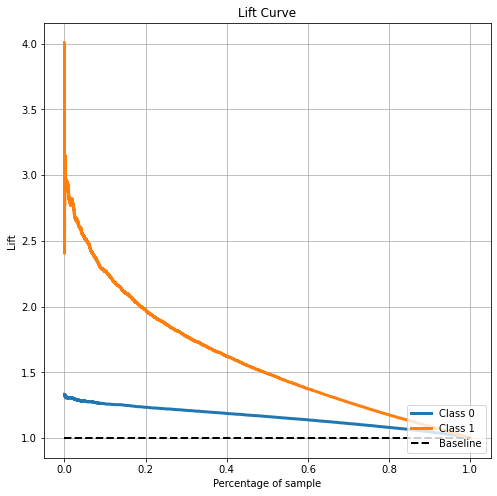

In [21]:
# Plot the lift curve
skplt.metrics.plot_lift_curve(y_val, predicted_probabilities, figsize=(8,8));

Here we can see how many times more than average targets are included in this group. Lift is calculated as the ratio of Cumulative Gains from classification and random models. Consider the lift at 50%(the desired target of promotion); we can notice that the top 50% of observations contain 70% of targets. If the average incidence of targets is 50%, so the lift is 1.5. Thus, the model allows addressing 1.5 times more targets for this group, compared with addressing without the model, that is randomly.

In [22]:
    #save the model to disk
model = rfreg
filename = "random_forest.sav"
pickle.dump(model, open(filename, 'wb'))